<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__3)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-3.csv',
 'data_multi_delta_0_n30-3.csv',
 'data_multi_delta_0_n60-3.csv',
 'data_multi_delta_0_n120-3.csv',
 'data_multi_delta_0_n250-3.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20-3.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,52.376395,63.324515,0.077945,170.402694,170.535906,-0.133212
1,0.0,1.0,47.067808,56.941057,26.003796,-0.059190,139.953470,140.016891,-0.063421
2,0.0,2.0,99.291665,22.849533,30.957183,0.049787,163.148167,162.248013,0.900154
3,0.0,3.0,36.059748,76.212289,75.919027,0.638486,198.829550,198.738986,0.090563
4,0.0,4.0,22.561835,46.548889,54.756818,0.003634,133.871176,134.268238,-0.397062
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.736118,32.283169,93.439304,0.494578,157.953168,157.294254,0.658914
19996,999.0,16.0,51.055155,21.319518,58.940299,-0.413433,140.901539,140.935564,-0.034025
19997,999.0,17.0,76.385757,25.850937,43.014069,-1.014742,154.236022,154.802752,-0.566731
19998,999.0,18.0,73.277075,79.036874,96.798445,-0.074684,259.037711,259.114378,-0.076667


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,52.376395,63.324515,0.077945,170.402694,170.535906,-0.133212
1,0.0,1.0,47.067808,56.941057,26.003796,-0.059190,139.953470,140.016891,-0.063421
2,0.0,2.0,99.291665,22.849533,30.957183,0.049787,163.148167,162.248013,0.900154
3,0.0,3.0,36.059748,76.212289,75.919027,0.638486,198.829550,198.738986,0.090563
4,0.0,4.0,22.561835,46.548889,54.756818,0.003634,133.871176,134.268238,-0.397062
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.736118,32.283169,93.439304,0.494578,157.953168,157.294254,0.658914
19996,999.0,16.0,51.055155,21.319518,58.940299,-0.413433,140.901539,140.935564,-0.034025
19997,999.0,17.0,76.385757,25.850937,43.014069,-1.014742,154.236022,154.802752,-0.566731
19998,999.0,18.0,73.277075,79.036874,96.798445,-0.074684,259.037711,259.114378,-0.076667


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,52.376395,63.324515,0.077945,170.402694,170.535906,-0.133212
1,0.0,1.0,47.067808,56.941057,26.003796,-0.059190,139.953470,140.016891,-0.063421
2,0.0,2.0,99.291665,22.849533,30.957183,0.049787,163.148167,162.248013,0.900154
3,0.0,3.0,36.059748,76.212289,75.919027,0.638486,198.829550,198.738986,0.090563
4,0.0,4.0,22.561835,46.548889,54.756818,0.003634,133.871176,134.268238,-0.397062
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.736118,32.283169,93.439304,0.494578,157.953168,157.294254,0.658914
19996,999.0,16.0,51.055155,21.319518,58.940299,-0.413433,140.901539,140.935564,-0.034025
19997,999.0,17.0,76.385757,25.850937,43.014069,-1.014742,154.236022,154.802752,-0.566731
19998,999.0,18.0,73.277075,79.036874,96.798445,-0.074684,259.037711,259.114378,-0.076667


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

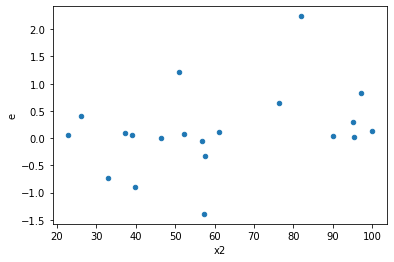

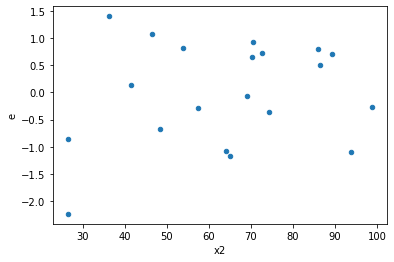

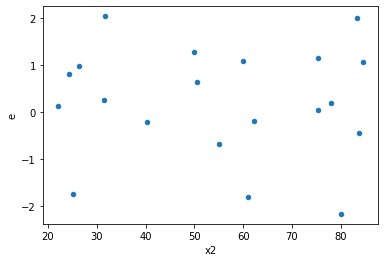

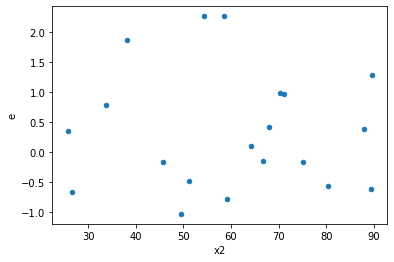

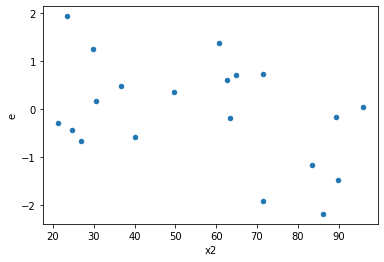

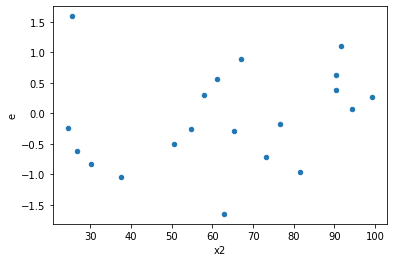

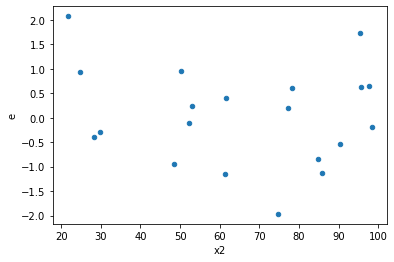

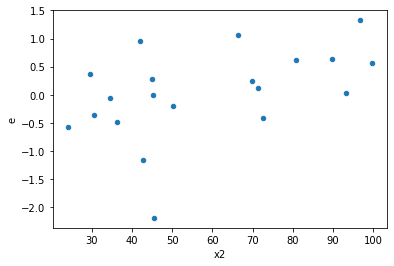

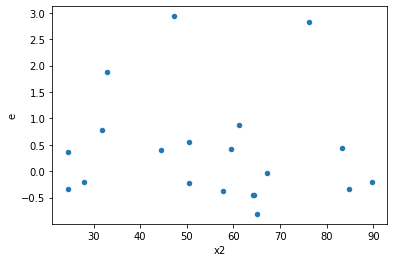

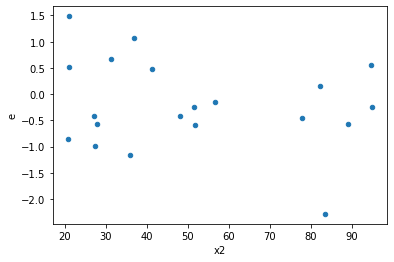

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,1.6280997236996968,2.725957140533845,0.3256199447399394,0.545191428106769,1.6743182870514681,0.585420498407863,0.7072897507960685,0.2927102492039315,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.38577685719203986,1.6882085809864271,0.07715537143840798,0.33764171619728545,4.376127156186656,0.13101616850131714,0.9344919157493414,0.06550808425065857,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2.5560755799509685,3.3523495299381008,0.5112151159901936,0.6704699059876201,1.3115220677482498,0.7732807026116437,0.6133596486941781,0.38664035130582186,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,5.693154310287414,6.567152379118335,1.1386308620574828,1.313430475823667,1.153517368614377,0.8792870306561007,0.5603564846719497,0.43964351532805035,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,0.587464763435728,11.628041813569373,0.11749295268714559,2.325608362713875,19.793598760824317,0.005229398801165797,0.9973853005994171,0.0026146994005828983,Reject001=0 : Heteroscedasticity
14.0,5.0,5.0,1.1234286089248482,2.2006967190386058,0.22468572178496965,0.44013934380772113,1.9589110527857505,0.4782617646975502,0.7608691176512249,0.2391308823487751,Reject001=1 : Homoscedasticity
18.0,5.0,5.0,0.43195629096593585,9.186791234701339,0.08639125819318717,1.8373582469402678,21.267872298278,0.004421902306739556,0.9977890488466302,0.002210951153369778,Reject001=0 : Heteroscedasticity
21.0,5.0,5.0,4.178665772794895,11.861621469963858,0.835733154558979,2.3723242939927713,2.8386145518477846,0.2768319400445487,0.8615840299777257,0.13841597002227435,Reject001=1 : Homoscedasticity
22.0,5.0,5.0,0.40498726039210575,0.9568056694024755,0.08099745207842116,0.19136113388049508,2.362557450513636,0.36714400824535987,0.8164279958773201,0.18357200412267993,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.6280997236996968,2.725957140533845,0.3256199447399394,0.545191428106769,1.6743182870514681,0.585420498407863,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,5.765995460772886,2.5615266413604965,1.1531990921545772,0.5123053282720993,0.4442470790667505,0.3940072861971315,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.38577685719203986,1.6882085809864271,0.07715537143840798,0.33764171619728545,4.376127156186656,0.13101616850131714,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2.5560755799509685,3.3523495299381008,0.5112151159901936,0.6704699059876201,1.3115220677482498,0.7732807026116437,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,5.693154310287414,6.567152379118335,1.1386308620574828,1.313430475823667,1.153517368614377,0.8792870306561007,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2.198421578011777,1.4418101934378722,0.4396843156023554,0.28836203868757443,0.655838810835284,0.6547199402534,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,3.6089548257451702,3.00602605788871,0.7217909651490341,0.601205211577742,0.8329353519319908,0.845907748414533,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,1.7155468139088486,0.5775230546836586,0.34310936278176973,0.11550461093673173,0.33664080163908827,0.25727788990212463,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7.52088299691443,2.864504079750616,1.5041765993828862,0.5729008159501232,0.38087337363522705,0.31298293695022533,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64